In [247]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib as plt
import matplotlib.pyplot as plt 

# pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)


In [ ]:
# Read Original dataset and select 'text' and 'isced' columns
df = pd.read_csv('D:\projects\okcupid\data\processed/preprocessed_cupid.csv', usecols = [ 'text', 'isced'])


df.dropna(subset=['isced', 'text'], inplace=True)

# Write the data that should be processed by LIWC in data/cupid_V0
df.to_csv(r"D:\projects\okcupid\data\liwc-data/cupid_v0.csv")

## LIWC meta data

In [224]:
df = pd.read_csv('D:\projects\okcupid\data\liwc-data/liwic_cupid_v0.csv', dtype=object, low_memory = False)

In [225]:
df.head()

,A,B,C,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,ppron,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,cogproc,insight,cause,discrep,tentat,certain,differ,percept,see,hear,feel,bio,body,health,sexual,ingest,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,relativ,motion,space,time,work,leisure,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler,AllPunc,Period,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,NaN,text,isced,1,"93,26","50,00","1,00","25,77","1,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00"
1,0,about me:i would love to think that i was some...,3.0,359,"83,13","55,53","40,11","94,26","12,82","17,55","83,29","48,47","12,81","10,58","6,41","0,28","3,90","0,00","0,00","2,23","5,85","15,60","6,69","2,79","5,57","1,11","13,93","7,24","3,06","0,00","1,11","2,23","7,80","5,85","1,39","0,00","0,56","0,00","9,19","0,00","0,84","0,00","0,56","14,21","3,34","1,11","2,51","4,46","0,56","3,90","2,79","1,11","0,84","0,56","4,74","1,95","1,11","0,00","0,56","7,24","3,06","2,79","0,28","1,95","0,00","1,11","10,58","0,00","8,36","0,56","5,29","2,51","2,23","1,95","0,56","0,56","0,00","0,00","0,84","0,56","0,00","0,28","0,00","0,00","16,43","10,03","3,34","0,84","0,00","0,00","0,28","0,00","0,00","0,84","1,11","0,00"
2,2,"i'm not ashamed of much, but writing public te...",7.0,462,"63,78","42,28","77,54","70,57","14,90","30,52","82,03","46,10","13,64","8,44","6,49","0,00","1,30","0,00","0,65","5,19","3,25","14,50","6,49","4,11","8,66","0,87","14,50","7,58","4,76","1,30","1,08","3,46","7,58","4,98","2,60","0,87","0,87","0,00","8,44","0,00","0,87","0,00","0,00","15,80","3,03","1,52","1,52","7,14","1,08","4,33","3,68","1,73","1,30","0,43","1,73","0,87","0,43","0,22","0,22","5,63","2,81","1,08","1,08","0,22","0,43","1,30","9,09","0,65","13,20","2,81","6,49","4,11","1,52","1,95","0,22","0,22","0,22","0,22","0,22","0,00","0,00","0,22","0,00","0,00","22,29","7,36","8,87","0,00","0,00","0,00","0,00","0,43","0,87","3,03","1,73","0,00"
3,3,i work in a library and go to school. . . read...,3.0,39,"71,92","60,13","46,75","73,64","19,50","33,33","87,18","41,03","12,82","10,26","7,69","0,00","2,56","0,00","0,00","2,56","5,13","10,26","2,56","2,56","10,26","0,00","17,95","2,56","2,56","0,00","0,00","0,00","7,69","5,13","2,56","2,56","0,00","0,00","10,26","0,00","0,00","0,00","0,00","5,13","2,56","0,00","0,00","0,00","0,00","2,56","2,56","0,00","0,00","2,56","0,00","0,00","0,00","0,00","0,00","10,26","2,56","5,13","5,13","2,56","0,00","2,56","10,26","0,00","7,69","2,56","2,56","2,56","20,51","5,13","0,00","0,00","0,00","2,56","0,00","0,00","0,00","0,00","0,00","0,00","10,26","10,26","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00"
4,4,hey how's it going? currently vague on the pro...,6.0,65,"93,26","43,89","63,54","99,00","10,83","20,00","76,92","30,77","9,23","7,69","7,69","0,00","0,00","0,00","0,00","1,54","4,62","12,31","1,54","3,08","3,08","0,00","13,85","6,15","1,54","1,54","0,00","3,08","9,23","9,23","0,00","0,00","0,00","0,00","6,15","1,54","0,00","0,00","0,00","10,77","3,08","3,08","0,00","4,62","0,00","0,00","7,69","6,15","0,00","1,54","0,00","0,00","0,00","0,00","0,00","9,23","1,54","7,69","0,00","0,00","0,00","0,00","16,92","3,08","12,31","1,54","6,15","

In [226]:
# df = df.iloc[1:, :]
df.rename(columns={'A':'pre_index', 'B':'text', 'C':'isced'}, inplace=True)
df = df.iloc[1:, 2:]


In [227]:
df.columns

Index(['isced', 'WC', 'Analytic', 'Clout', 'Authentic', 'Tone', 'WPS',
       'Sixltr', 'Dic', 'function', 'pronoun', 'ppron', 'i', 'we', 'you',
       'shehe', 'they', 'ipron', 'article', 'prep', 'auxverb', 'adverb',
       'conj', 'negate', 'verb', 'adj', 'compare', 'interrog', 'number',
       'quant', 'affect', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'social',
       'family', 'friend', 'female', 'male', 'cogproc', 'insight', 'cause',
       'discrep', 'tentat', 'certain', 'differ', 'percept', 'see', 'hear',
       'feel', 'bio', 'body', 'health', 'sexual', 'ingest', 'drives',
       'affiliation', 'achieve', 'power', 'reward', 'risk', 'focuspast',
       'focuspresent', 'focusfuture', 'relativ', 'motion', 'space', 'time',
       'work', 'leisure', 'home', 'money', 'relig', 'death', 'informal',
       'swear', 'netspeak', 'assent', 'nonflu', 'filler', 'AllPunc', 'Period',
       'Comma', 'Colon', 'SemiC', 'QMark', 'Exclam', 'Dash', 'Quote',
       'Apostro', 'Parenth', 'OtherP']

In [228]:
df.head(2)

,isced,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,ppron,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,cogproc,insight,cause,discrep,tentat,certain,differ,percept,see,hear,feel,bio,body,health,sexual,ingest,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,relativ,motion,space,time,work,leisure,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler,AllPunc,Period,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
1,3.0,359,"83,13","55,53","40,11","94,26","12,82","17,55","83,29","48,47","12,81","10,58","6,41","0,28","3,90","0,00","0,00","2,23","5,85","15,60","6,69","2,79","5,57","1,11","13,93","7,24","3,06","0,00","1,11","2,23","7,80","5,85","1,39","0,00","0,56","0,00","9,19","0,00","0,84","0,00","0,56","14,21","3,34","1,11","2,51","4,46","0,56","3,90","2,79","1,11","0,84","0,56","4,74","1,95","1,11","0,00","0,56","7,24","3,06","2,79","0,28","1,95","0,00","1,11","10,58","0,00","8,36","0,56","5,29","2,51","2,23","1,95","0,56","0,56","0,00","0,00","0,84","0,56","0,00","0,28","0,00","0,00","16,43","10,03","3,34","0,84","0,00","0,00","0,28","0,00","0,00","0,84","1,11","0,00"
2,7.0,462,"63,78","42,28","77,54","70,57","14,90","30,52","82,03","46,10","13,64","8,44","6,49","0,00","1,30","0,00","0,65","5,19","3,25","14,50","6,49","4,11","8,66","0,87","14,50","7,58","4,76","1,30","1,08","3,46","7,58","4,98","2,60","0,87","0,87","0,00","8,44","0,00","0,87","0,00","0,00","15,80","3,03","1,52","1,52","7,14","1,08","4,33","3,68","1,73","1,30","0,43","1,73","0,87","0,43","0,22","0,22","5,63","2,81","1,08","1,08","0,22","0,43","1,30","9,09","0,65","13,20","2,81","6,49","4,11","1,52","1,95","0,22","0,22","0,22","0,22","0,22","0,00","0,00","0,22","0,00","0,00","22,29","7,36","8,87","0,00","0,00","0,00","0,00","0,43","0,87","3,03","1,73","0,00"


In [229]:
df.replace(',','.',inplace=True,  regex=True)
df = df.astype(float)

df['isced'].mask(df['isced'].isin([3.0, 5.0]) , 1.0, inplace=True)
df['isced'].mask(df['isced'].isin([6.0, 7.0]) , 8.0, inplace=True)

data = df.iloc[:, 1:]
target = df.iloc[:, 0].astype(float)

In [230]:
# data['Analytic'] = data['Analytic'].str.replace(',', '.')
# data.replace(',','.',inplace=True,  regex=True)


In [231]:
# data = data.astype(float)
# data_scale = preprocessing.scale(data)
# scaler = preprocessing.StandardScaler().fit(X_train)


In [232]:
# data_scale.mean(axis=0)
# data_scale.std(axis=0)

In [233]:
X_train,X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2)

scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [234]:
LogisticRegr = LogisticRegression(random_state=0, max_iter=10000, solver='lbfgs', penalty='l2', class_weight='balanced')
LogisticRegr.fit(X_train_scaled, y_train)
X_val_scaler = scaler.transform(X_val)
predictions = LogisticRegr.predict(X_val_scaler)



In [235]:

print("Final Accuracy for Logistic: %s"% accuracy_score(y_val, predictions))

Final Accuracy for Logistic: 0.6965336003003378


In [236]:

conf_mat = confusion_matrix(y_val, predictions)
print(conf_mat)
print("Final Accuracy for Logistic: %s"% accuracy_score(y_val, predictions))
cm = confusion_matrix(y_val,predictions)
# plt.figure()
# plot_confusion_matrix(cm, classes=[0,1], normalize=False,
#                       title='Confusion Matrix')
print(classification_report(y_val, predictions))

[[1124  632]
 [1793 4442]]
Final Accuracy for Logistic: 0.6965336003003378
              precision    recall  f1-score   support

         1.0       0.39      0.64      0.48      1756
         8.0       0.88      0.71      0.79      6235

    accuracy                           0.70      7991
   macro avg       0.63      0.68      0.63      7991
weighted avg       0.77      0.70      0.72      7991



In [254]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

LogisticRegr_cross = LogisticRegression(random_state=0, max_iter=10000, solver='lbfgs', penalty='l2', class_weight='balanced')
LogisticRegr_cross.fit(X_train_scaled, y_train)

data_scaler = scaler.transform(data)


scores = cross_val_score(LogisticRegr_cross, data_scaler, target, cv=5)
print(scores)
print(scores.mean())


y_pred = cross_val_predict(LogisticRegr_cross, X_val_scaler, y_val, cv=5)
conf_mat = confusion_matrix(y_val, y_pred)
print(conf_mat)

[0.6903594  0.70377415 0.70507558 0.69203044 0.68902683]
0.6960532797531028
[[1099  657]
 [1800 4435]]


Feature: 0, Score: 0.02420
Feature: 1, Score: 0.28823
Feature: 2, Score: 0.20083
Feature: 3, Score: 0.07588
Feature: 4, Score: 0.08642
Feature: 5, Score: -0.09502
Feature: 6, Score: 0.21757
Feature: 7, Score: 0.00639
Feature: 8, Score: 0.59152
Feature: 9, Score: -0.09084
Feature: 10, Score: -0.12713
Feature: 11, Score: -0.14291
Feature: 12, Score: 0.01002
Feature: 13, Score: -0.02615
Feature: 14, Score: 0.13527
Feature: 15, Score: 0.00074
Feature: 16, Score: -0.05088
Feature: 17, Score: -0.10789
Feature: 18, Score: -0.41196
Feature: 19, Score: -0.15516
Feature: 20, Score: -0.05568
Feature: 21, Score: -0.08644
Feature: 22, Score: -0.04321
Feature: 23, Score: -0.17124
Feature: 24, Score: 0.07970
Feature: 25, Score: 0.01858
Feature: 26, Score: 0.06269
Feature: 27, Score: -0.06936
Feature: 28, Score: 0.03502
Feature: 29, Score: -0.23414
Feature: 30, Score: 0.36445
Feature: 31, Score: 0.09167
Feature: 32, Score: -0.06030
Feature: 33, Score: -0.02291
Feature: 34, Score: -0.02131
Feature: 35,

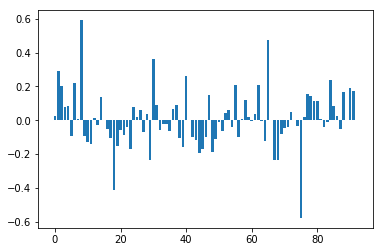

In [250]:
import matplotlib.pyplot as plt

importance = LogisticRegr.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [219]:
from sklearn import svm

In [221]:
clf = svm.SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0)
clf.fit(X_train_scaled, y_train)
X_val_scaler = scaler.transform(X_val)
predictions_svm = clf.predict(X_val_scaler)
print("Final Accuracy for Logistic: %s"% accuracy_score(y_val, predictions_svm))
conf_mat = confusion_matrix(y_val, predictions_svm)
print(conf_mat)
print("Final Accuracy for Logistic: %s"% accuracy_score(y_val, predictions_svm))
cm = confusion_matrix(y_val,predictions_svm)
# plt.figure()
print(classification_report(y_val, predictions_svm))

Final Accuracy for Logistic: 0.7032912026029283
[[1129  643]
 [1728 4491]]
Final Accuracy for Logistic: 0.7032912026029283
              precision    recall  f1-score   support

         1.0       0.40      0.64      0.49      1772
         8.0       0.87      0.72      0.79      6219

    accuracy                           0.70      7991
   macro avg       0.63      0.68      0.64      7991
weighted avg       0.77      0.70      0.72      7991



<Figure size 432x288 with 0 Axes>

In [15]:
from sklearn.naive_bayes import MultinomialNB




clf = MultinomialNB()
clf.fit(X_train, y_train)
X_val_scaler = scaler.transform(X_val)
predictions_NB = clf.predict(X_val)
print("Final Accuracy for Logistic: %s"% accuracy_score(y_val, predictions_NB))
conf_mat = confusion_matrix(y_val, predictions_NB)
print(conf_mat)
print("Final Accuracy for NB: %s"% accuracy_score(y_val, predictions_NB))
cm = confusion_matrix(y_val,predictions_NB)
# plt.figure()
print(classification_report(y_val, predictions_NB))


Final Accuracy for Logistic: 0.5175822800650732
[[1275  488]
 [3367 2861]]
Final Accuracy for NB: 0.5175822800650732
              precision    recall  f1-score   support

         1.0       0.27      0.72      0.40      1763
         8.0       0.85      0.46      0.60      6228

    accuracy                           0.52      7991
   macro avg       0.56      0.59      0.50      7991
weighted avg       0.73      0.52      0.55      7991



## Merge Text and Metadata

In [182]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer


In [183]:
df = pd.read_csv('D:\projects\okcupid\data\liwc-data/liwic_cupid.csv', dtype=object, low_memory = False)
df.rename(columns={'A':'pre_index', 'B':'text', 'C':'isced', 'D':'clean_text'}, inplace=True)
df = df.iloc[1:, :]


df.head(2)

,pre_index,text,isced,clean_text,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,ppron,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,cogproc,insight,cause,discrep,tentat,certain,differ,percept,see,hear,feel,bio,body,health,sexual,ingest,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,relativ,motion,space,time,work,leisure,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler,AllPunc,Period,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
1,0,about me:i would love to think that i was some...,3.0,mei love think kind intellectualeither dumbest...,359,"83,13","55,53","40,11","94,26","12,82","17,55","83,29","48,47","12,81","10,58","6,41","0,28","3,90","0,00","0,00","2,23","5,85","15,60","6,69","2,79","5,57","1,11","13,93","7,24","3,06","0,00","1,11","2,23","7,80","5,85","1,39","0,00","0,56","0,00","9,19","0,00","0,84","0,00","0,56","14,21","3,34","1,11","2,51","4,46","0,56","3,90","2,79","1,11","0,84","0,56","4,74","1,95","1,11","0,00","0,56","7,24","3,06","2,79","0,28","1,95","0,00","1,11","10,58","0,00","8,36","0,56","5,29","2,51","2,23","1,95","0,56","0,56","0,00","0,00","0,84","0,56","0,00","0,28","0,00","0,00","16,43","10,03","3,34","0,84","0,00","0,00","0,28","0,00","0,00","0,84","1,11","0,00"
2,2,"i'm not ashamed of much, but writing public te...",7.0,im ashamed writing public text onlinedating si...,462,"63,78","42,28","77,54","70,57","14,90","30,52","82,03","46,10","13,64","8,44","6,49","0,00","1,30","0,00","0,65","5,19","3,25","14,50","6,49","4,11","8,66","0,87","14,50","7,58","4,76","1,30","1,08","3,46","7,58","4,98","2,60","0,87","0,87","0,00","8,44","0,00","0,87","0,00","0,00","15,80","3,03","1,52","1,52","7,14","1,08","4,33","3,68","1,73","1,30","0,43","1,73","0,87","0,43","0,22","0,22","5,63","2,81","1,08","1,08","0,22","0,43","1,30","9,09","0,65","13,20","2,81","6,49","4,11","1,52","1,95","0,22","0,22","0,22","0,22","0,22","0,00","0,00","0,22","0,00","0,00","22,29","7,36","8,87","0,00","0,00","0,00","0,00","0,43","0,87","3,03","1,73","0,00"


In [184]:
# col1='clean_text'
# col2='isced'
# df = df[[col1 if col == col2 else col2 if col == col1 else col for col in df.columns]]
# df.head(2)


In [185]:
df = df.iloc[ : , 2: ]
df.head()

,isced,clean_text,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,ppron,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,cogproc,insight,cause,discrep,tentat,certain,differ,percept,see,hear,feel,bio,body,health,sexual,ingest,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,relativ,motion,space,time,work,leisure,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler,AllPunc,Period,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
1,3.0,mei love think kind intellectualeither dumbest...,359,"83,13","55,53","40,11","94,26","12,82","17,55","83,29","48,47","12,81","10,58","6,41","0,28","3,90","0,00","0,00","2,23","5,85","15,60","6,69","2,79","5,57","1,11","13,93","7,24","3,06","0,00","1,11","2,23","7,80","5,85","1,39","0,00","0,56","0,00","9,19","0,00","0,84","0,00","0,56","14,21","3,34","1,11","2,51","4,46","0,56","3,90","2,79","1,11","0,84","0,56","4,74","1,95","1,11","0,00","0,56","7,24","3,06","2,79","0,28","1,95","0,00","1,11","10,58","0,00","8,36","0,56","5,29","2,51","2,23","1,95","0,56","0,56","0,00","0,00","0,84","0,56","0,00","0,28","0,00","0,00","16,43","10,03","3,34","0,84","0,00","0,00","0,28","0,00","0,00","0,84","1,11","0,00"
2,7.0,im ashamed writing public text onlinedating si...,462,"63,78","42,28","77,54","70,57","14,90","30,52","82,03","46,10","13,64","8,44","6,49","0,00","1,30","0,00","0,65","5,19","3,25","14,50","6,49","4,11","8,66","0,87","14,50","7,58","4,76","1,30","1,08","3,46","7,58","4,98","2,60","0,87","0,87","0,00","8,44","0,00","0,87","0,00","0,00","15,80","3,03","1,52","1,52","7,14","1,08","4,33","3,68","1,73","1,30","0,43","1,73","0,87","0,43","0,22","0,22","5,63","2,81","1,08","1,08","0,22","0,43","1,30","9,09","0,65","13,20","2,81","6,49","4,11","1,52","1,95","0,22","0,22","0,22","0,22","0,22","0,00","0,00","0,22","0,00","0,00","22,29","7,36","8,87","0,00","0,00","0,00","0,00","0,43","0,87","3,03","1,73","0,00"
3,3.0,work library school reading things written old...,39,"71,92","60,13","46,75","73,64","19,50","33,33","87,18","41,03","12,82","10,26","7,69","0,00","2,56","0,00","0,00","2,56","5,13","10,26","2,56","2,56","10,26","0,00","17,95","2,56","2,56","0,00","0,00","0,00","7,69","5,13","2,56","2,56","0,00","0,00","10,26","0,00","0,00","0,00","0,00","5,13","2,56","0,00","0,00","0,00","0,00","2,56","2,56","0,00","0,00","2,56","0,00","0,00","0,00","0,00","0,00","10,26","2,56","5,13","5,13","2,56","0,00","2,56","10,26","0,00","7,69","2,56","2,56","2,56","20,51","5,13","0,00","0,00","0,00","2,56","0,00","0,00","0,00","0,00","0,00","0,00","10,26","10,26","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00"
4,6.0,hey hows going currently vague profile know to...,65,"93,26","43,89","63,54","99,00","10,83","20,00","76,92","30,77","9,23","7,69","7,69","0,00","0,00","0,00","0,00","1,54","4,62","12,31","1,54","3,08","3,08","0,00","13,85","6,15","1,54","1,54","0,00","3,08","9,23","9,23","0,00","0,00","0,00","0,00","6,15","1,54","0,00","0,00","0,00","10,77","3,08","3,08","0,00","4,62","0,00","0,00","7,69","6,15","0,00","1,54","0,00","0,00","0,00","0,00","0,00","9,23","1,54","7,69","0,00","0,00","0,00","0,00","16,92","3,08","12,31","1,54","6,15","4,62","6,15","4,62","0,00","1,54","0,00","0,00","4,62","0,00","3,08","0,00","0,00","0,00","29,23","12,31","3,08","1,54","0,00","1,54","0,00","0,00","0,00","3,08","0,00","7,69"
5,6.0,im australian living san francisco dont hold t...,252,"28,34","22,55","96,82","99,00","10,08","20,24","86,90","48,81","19,84","14,68","13,89","0,00","0,40","0,00","0,40","5,16","2,78","11,11","10,32","4,37","7,14","1,19","20,63","5,56","1,98","2,78","0,40","1,59","12,30","9,92","2,38","0,00","0,79","0,40","10,32","0,00","0,40","0,00","0,00","15,87","6,75","1,98","0,79","5,56","0,79","1,98","5,56","1,59","3,17","0,79","3,17","2,38","0,40","0,00","0,00","6,35","1,59","0,79","1,19"

In [186]:
df.iloc[:, 2: ].replace(',','.',inplace=True,  regex=True)
df.iloc[:, 2: ] = df.iloc[ : , 2: ].astype(float)
df['clean_text'] = df['clean_text'].astype(str)


C:\Users\nadin001\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


In [187]:
df['isced'] = df['isced'].astype(float)
df['isced'].mask(df['isced'].isin([3, 5.0, 1.0]) , 0 , inplace=True) # 0 for primary education
df['isced'].mask(df['isced'].isin([6.0, 7.0, 8.0]) , 1 , inplace=True) # 1 for high education
# df['isced'] = df['isced'].astype(int)

df.head(2)

,isced,clean_text,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,ppron,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,cogproc,insight,cause,discrep,tentat,certain,differ,percept,see,hear,feel,bio,body,health,sexual,ingest,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,relativ,motion,space,time,work,leisure,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler,AllPunc,Period,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
1,0.0,mei love think kind intellectualeither dumbest...,359,83.13,55.53,40.11,94.26,12.82,17.55,83.29,48.47,12.81,10.58,6.41,0.28,3.9,0,0,2.23,5.85,15.6,6.69,2.79,5.57,1.11,13.93,7.24,3.06,0,1.11,2.23,7.8,5.85,1.39,0,0.56,0,9.19,0,0.84,0,0.56,14.21,3.34,1.11,2.51,4.46,0.56,3.9,2.79,1.11,0.84,0.56,4.74,1.95,1.11,0,0.56,7.24,3.06,2.79,0.28,1.95,0,1.11,10.58,0,8.36,0.56,5.29,2.51,2.23,1.95,0.56,0.56,0,0,0.84,0.56,0,0.28,0,0,16.43,10.03,3.34,0.84,0,0,0.28,0,0,0.84,1.11,0
2,1.0,im ashamed writing public text onlinedating si...,462,63.78,42.28,77.54,70.57,14.9,30.52,82.03,46.1,13.64,8.44,6.49,0,1.3,0,0.65,5.19,3.25,14.5,6.49,4.11,8.66,0.87,14.5,7.58,4.76,1.3,1.08,3.46,7.58,4.98,2.6,0.87,0.87,0,8.44,0,0.87,0,0,15.8,3.03,1.52,1.52,7.14,1.08,4.33,3.68,1.73,1.3,0.43,1.73,0.87,0.43,0.22,0.22,5.63,2.81,1.08,1.08,0.22,0.43,1.3,9.09,0.65,13.2,2.81,6.49,4.11,1.52,1.95,0.22,0.22,0.22,0.22,0.22,0,0,0.22,0,0,22.29,7.36,8.87,0,0,0,0,0.43,0.87,3.03,1.73,0


In [188]:
data = df.iloc[:, 1:]
target = df.iloc[:, 0].astype(float)

In [189]:
# vectorization
X_t, X_test, y_t, y_test = train_test_split(data, target, train_size=0.75, stratify=target,
                                                          test_size=0.25, random_state = 0)


In [190]:
X_t.shape

(37457, 94)

In [191]:
y_test.value_counts()

1.0    9740
0.0    2746
Name: isced, dtype: int64

In [192]:
X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, train_size=0.75, stratify=y_t, test_size=0.25, random_state = 0)

In [244]:
y_train;

In [194]:
cols = X_train.columns
cols = cols[1:]
cols
get_text_data = FunctionTransformer(lambda x: x['clean_text'], validate=False)
get_numeric_data = FunctionTransformer(lambda x: x[cols], validate=False)


In [195]:
# merge vectorized text data and scaled numeric data
process_and_join_features = Pipeline([
    ('features', FeatureUnion([
            ('numeric_features', Pipeline([
                ('selector', get_numeric_data),
                ('scaler', preprocessing.StandardScaler())
                
            ])),
             ('text_features', Pipeline([
                ('selector', get_text_data),
                ('vec', CountVectorizer(binary=False, ngram_range=(1, 2), lowercase=True))
            ]))
         ])),
    ('clf', LogisticRegression(random_state=0,max_iter=5000, solver='sag', penalty='l2', class_weight='balanced'))
])

# 
process_and_join_features.fit(X_train, y_train)
predictions = process_and_join_features.predict(X_val)


print("Final Accuracy for Logistic: %s"% accuracy_score(y_val, predictions))
cm = confusion_matrix(y_val,predictions)
# plt.figure()
# plot_confusion_matrix(cm, classes=[0,1], normalize=False,
#                       title='Confusion Matrix')

print(classification_report(y_val, predictions))

Final Accuracy for Logistic: 0.8298985584623598


NameError: name 'plot_confusion_matrix' is not defined

In [197]:
cm = confusion_matrix(y_val,predictions)
print(cm)

print(classification_report(y_val, predictions))

[[1287  773]
 [ 820 6485]]
              precision    recall  f1-score   support

         0.0       0.61      0.62      0.62      2060
         1.0       0.89      0.89      0.89      7305

    accuracy                           0.83      9365
   macro avg       0.75      0.76      0.75      9365
weighted avg       0.83      0.83      0.83      9365

